<a href="https://colab.research.google.com/github/xcansuxakgul/UrbanSoundClassification/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [12]:
X_train= np.load('/content/drive/MyDrive/X_train.npy')
X_val= np.load('/content/drive/MyDrive/X_val.npy')
X_test= np.load('/content/drive/MyDrive/X_test.npy')
y_train = np.load('/content/drive/MyDrive/y_train.npy')
y_val = np.load('/content/drive/MyDrive/y_val.npy')
y_test = np.load('/content/drive/MyDrive/y_test.npy')

In [13]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), padding="same", activation="relu", input_shape=(32,32,1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding="same", activation="relu"))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-trai

In [15]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [16]:
model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs= 50, validation_data=(X_val, y_val))

Epoch 1/50
221/221 [==============================] - 2s 6ms/step - loss: 2.0697 - accuracy: 0.2291 - val_loss: 1.6671 - val_accuracy: 0.4084
Epoch 2/50
221/221 [==============================] - 1s 4ms/step - loss: 1.7687 - accuracy: 0.3531 - val_loss: 1.4407 - val_accuracy: 0.5254
Epoch 3/50
221/221 [==============================] - 1s 4ms/step - loss: 1.5890 - accuracy: 0.4348 - val_loss: 1.2427 - val_accuracy: 0.5916
Epoch 4/50
221/221 [==============================] - 1s 5ms/step - loss: 1.4381 - accuracy: 0.4900 - val_loss: 1.0665 - val_accuracy: 0.6832
Epoch 5/50
221/221 [==============================] - 2s 8ms/step - loss: 1.3369 - accuracy: 0.5260 - val_loss: 0.9934 - val_accuracy: 0.6959
Epoch 6/50
221/221 [==============================] - 2s 8ms/step - loss: 1.2503 - accuracy: 0.5629 - val_loss: 0.9329 - val_accuracy: 0.6985
Epoch 7/50
221/221 [==============================] - 1s 5ms/step - loss: 1.1789 - accuracy: 0.5963 - val_loss: 0.8092 - val_accuracy: 0.7265
Epoch 

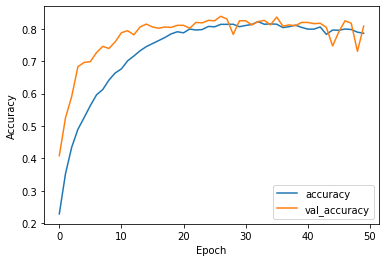

In [21]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [20]:
model.evaluate(X_test,y_test)

28/28 [==============================] - 0s 4ms/step - loss: 0.9842 - accuracy: 0.7780


[0.9841741323471069, 0.7780320644378662]